In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
df=pd.read_csv("/content/sample_data/XSS_dataset.csv")

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Sentence,0
Label,0


In [7]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [8]:
df.tail()

,Unnamed: 0,Sentence,Label
13681,13681,<img onpointerenter=alert(1)>XSS</img>,1
13682,13682,"<source onbeforepaste=""alert(1)"" contenteditab...",1
13683,13683,"<div draggable=""true"" contenteditable>drag me<...",1
13684,13684,"<li><cite id=""CITEREFDomingos2015"" class=""cita...",0
13685,13685,\t </span>,0


In [10]:
df=df.drop(columns=['Unnamed: 0'])

In [11]:
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13686 entries, 0 to 13685
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  13686 non-null  object
 1   Label     13686 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 214.0+ KB


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

X = vectorizer.fit_transform(df['Sentence'])

y = df['Label']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9974433893352812

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1260
           1       1.00      1.00      1.00      1478

    accuracy                           1.00      2738
   macro avg       1.00      1.00      1.00      2738
weighted avg       1.00      1.00      1.00      2738


Confusion Matrix:
 [[1258    2]
 [   5 1473]]


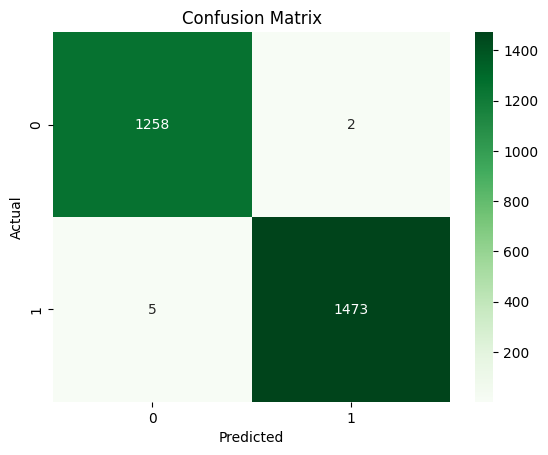

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
import joblib

# Save model and vectorizer
joblib.dump(dt, 'xss_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [25]:
new_sentences = ["<div class=\"thumbcaption\">", "<svg onload=\"alert('XSS')\"></svg>"]

loaded_model = joblib.load('xss_classifier.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

new_X = loaded_vectorizer.transform(new_sentences)
new_predictions = loaded_model.predict(new_X)

print("Predictions:", new_predictions)

Predictions: [0 1]
